In [39]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from multiprocessing import Process
from eeg_clean import clean, epoch_stats
from data_quality import ica_score
from plotting.templates import plot_dens_scatter, plot_n_boxplots, plot_dist_hist

First Analysis of how quasi thresholding does on its own

In [40]:
baseline_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\baseline_results.npy")
baseline_alternate_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\baseline_results_alternate.npy")

In [41]:
baseline_results = np.load(baseline_folder)

In [42]:
baseline_results_alternate = np.load(baseline_alternate_folder)

In [43]:
epi_ar_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\auto_reject\0")
epi_ar_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\epi_data\auto_reject\1")

In [44]:
epi_ar_ec_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [45]:
epi_ar_eo_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [46]:
for i, pth in enumerate(epi_ar_ec_folder.iterdir()):
    current = np.load(pth)
    epi_ar_ec_results[i, :, :, :] = current.copy()[1:, :, :]

In [47]:
for i, pth in enumerate(epi_ar_eo_folder.iterdir()):
    current = np.load(pth)
    epi_ar_eo_results[i, :, :, :] = current.copy()[1:, :, :]

In [48]:
epi_ar_results = epi_ar_ec_results.__add__(epi_ar_eo_results)/2

In [49]:
wang_ar_ec_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\auto_reject\0")
wang_ar_eo_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\yulin_wang\auto_reject\1")

In [50]:
wang_ar_ec_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [51]:
wang_ar_eo_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [52]:
for i, pth in enumerate(wang_ar_ec_folder.iterdir()):
    current = np.load(pth)
    wang_ar_ec_results[i, :, :, :] = current.copy()[1:, :, :]

In [53]:
for i, pth in enumerate(wang_ar_eo_folder.iterdir()):
    current = np.load(pth)
    wang_ar_eo_results[i, :, :, :] = current.copy()[1:, :, :]

In [54]:
wang_ar_results = wang_ar_ec_results.__add__(wang_ar_eo_results)/2

In [55]:
srm_ar_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\srm_data\auto_reject")

In [56]:
srm_ar_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [57]:
for i, pth in enumerate(srm_ar_folder.iterdir()):
    current = np.load(pth)
    srm_ar_results[i, :, :, :] = current.copy()[1:, :, :]

In [58]:
spis_ar_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\auto_reject")

In [59]:
spis_ar_alternate_results = np.zeros(
    (   
        8,
        8,
        2,
        5
    )
)

In [60]:
count=0
for i, pth in enumerate(spis_ar_folder.iterdir()):
    current = np.load(pth)
    spis_ar_alternate_results[count, :] += current.copy()
    if i%2 != 0:
        count+=1

In [61]:
spis_ar_alternate_results /= 2

In [62]:
spis_ar_results = np.zeros(
    (   
        16,
        8,
        2,
        5
    )
)

In [63]:
for i, pth in enumerate(spis_ar_folder.iterdir()):
    current = np.load(pth)
    spis_ar_results[i, :, :, :] = current.copy()

In [64]:
ar_results = np.zeros(
    (   
        64,
        8,
        2,
        5
    )
)

In [65]:
ar_results_alternate = np.zeros(
    (   
        56,
        8,
        2,
        5
    )
)

In [66]:
ar_results[0:16, :, :, :] = epi_ar_results
ar_results[16:32, :, :, :] = srm_ar_results
ar_results[32:48, :, :, :] = spis_ar_results
ar_results[48:64, :, :, :] = wang_ar_results

In [67]:
ar_results_alternate[0:16, :] = epi_ar_results
ar_results_alternate[16:32, :] = srm_ar_results
ar_results_alternate[32:40, :] = spis_ar_alternate_results
ar_results_alternate[40:56, :] = wang_ar_results

In [68]:
ar_results[:, :, :, 2] -= ar_results[:, :, :, 1]

In [69]:
ar_results_alternate[:, :, :, 2] -= ar_results_alternate[:, :, :, 1]

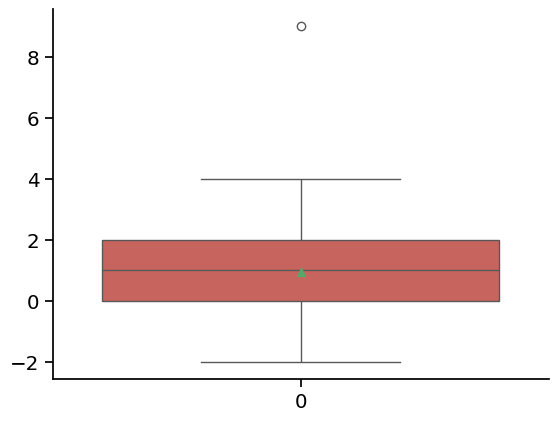

In [70]:
plot_n_boxplots([ar_results_alternate[:, 2, 1, 1]], [sns.xkcd_rgb["pale red"]])

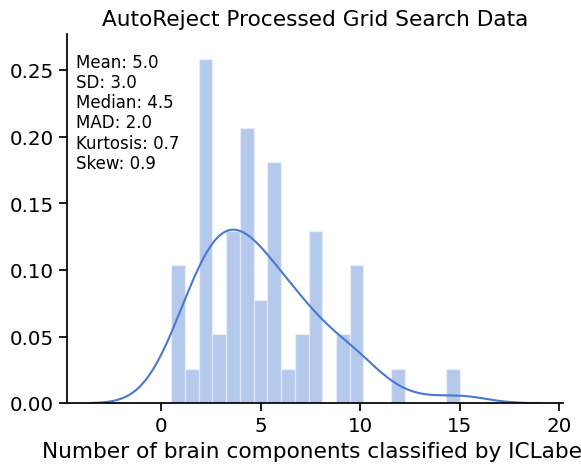

In [71]:
plot_dist_hist(ar_results_alternate[:, 2, 1, 1]+baseline_results_alternate[:, 1], 'AutoReject Processed Grid Search Data', 'Number of brain components classified by ICLabel')
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\grid_brain_autoreject")

In [72]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\autorej", ar_results_alternate[:, 2, 1, 1]+baseline_results_alternate[:, 1])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1\autorej_ex", ar_results_alternate[:, 2, 1, 0])

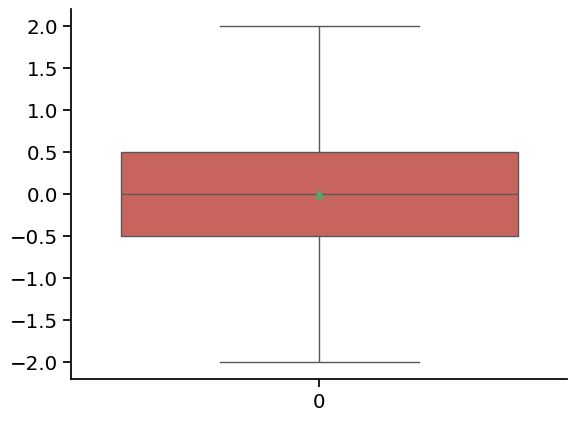

In [73]:
plot_n_boxplots([ar_results_alternate[:, 3, 0, 2]], [sns.xkcd_rgb["pale red"]])

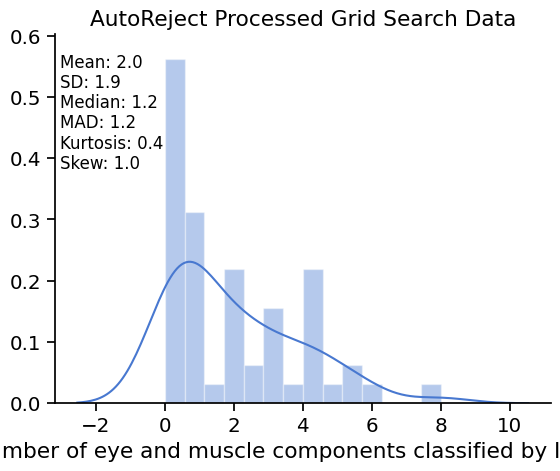

In [74]:
plot_dist_hist(ar_results_alternate[:, 3, 0, 2]+baseline_results_alternate[:, 2], 'AutoReject Processed Grid Search Data', 'Number of eye and muscle components classified by ICLabel')
plt.savefig(r"C:\Users\workbench\eirik_master\code\Masteroppgave2\images\grid_artefact_autoreject")

In [75]:
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\autorej", ar_results_alternate[:, 3, 0, 2]+baseline_results_alternate[:, 2])
np.save(r"C:\Users\workbench\eirik_master\Results\linear_reg_1_art\autorej_ex", ar_results_alternate[:, 3, 0, 0])

In [76]:
print(ar_results[:, 3, 0, 2]+baseline_results[:, 2])

[4.  2.  4.5 4.  3.  0.5 0.5 3.  2.  4.5 4.  2.  1.  5.  6.  2.  1.  1.
 0.  2.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.
 0.  1.  0.  1.  0.  0.  0.  2.  0.  1.  0.  0.  4.5 0.5 2.  3.5 4.  3.
 5.5 0.5 5.5 8.  2.5 2.5 3.  1.5 3.  2. ]


In [582]:
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 0], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 1], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 2], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 3], 0)), (5, 2)))
print(np.unravel_index(np.argmax(np.mean(ar_results[:, :, :, 4], 0)), (5, 2)))

(0, 1)
(2, 1)
(3, 0)
(2, 1)
(3, 0)


Investigating the statisitcs of itteration maximazing the average number of braincomponents.

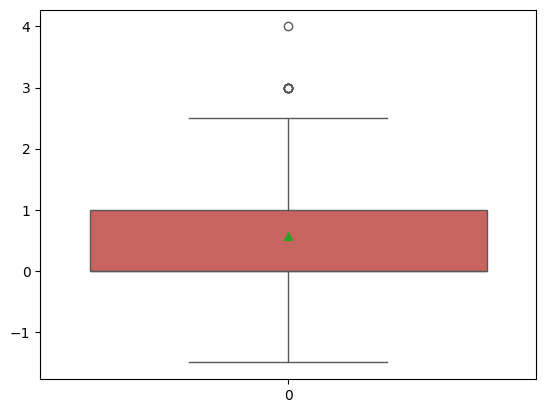

In [ ]:
plot_n_boxplots([ar_results[:, 1, 1, 1].flatten()], [sns.xkcd_rgb["pale red"]])

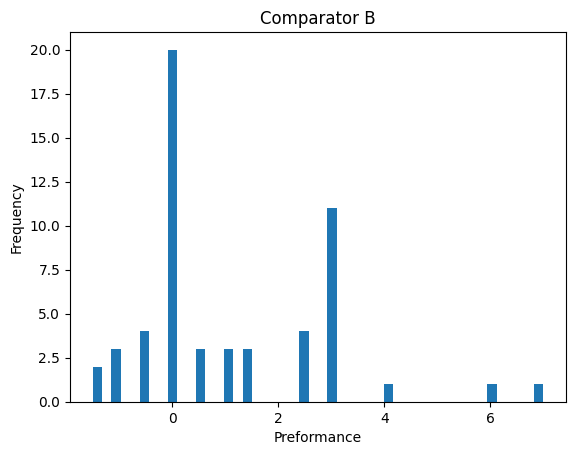

In [75]:
plt.hist(ar_results_alternate[:, 1, 1, 1].flatten(), bins=48)
plt.ylabel('Frequency')
plt.xlabel('Preformance')
plt.title('Comparator B')
plt.show()

In [45]:
print(np.mean(ar_results_alternate[:, 1, 1, 1].flatten()))

1.0892857142857142


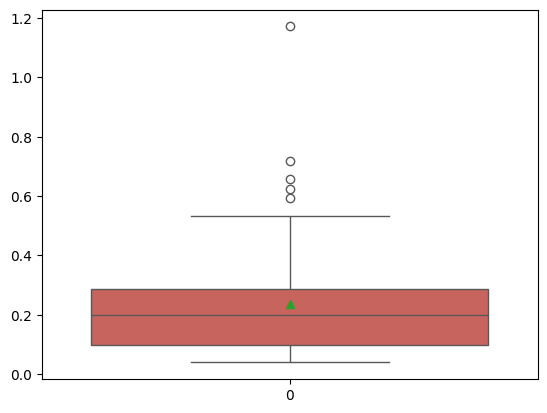

In [64]:
plot_n_boxplots([ar_results[:, 1, 1, 0].flatten()], [sns.xkcd_rgb["pale red"]])

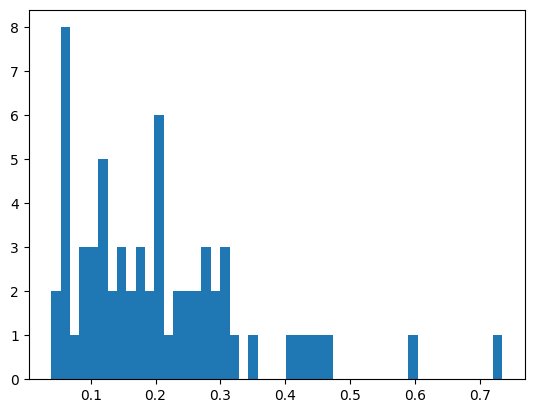

In [67]:
plt.hist([ar_results[:, 1, 1, 0].flatten()], bins=48)
plt.show()

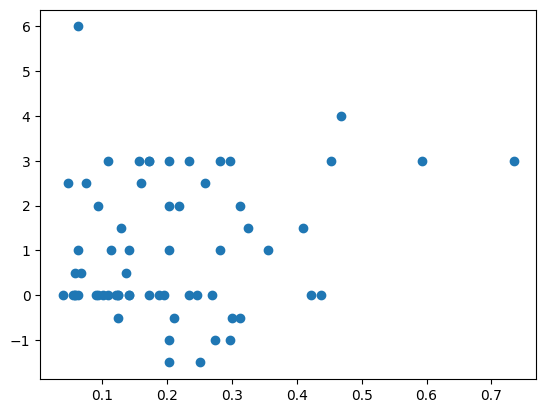

In [68]:
plt.scatter(ar_results[:, 1, 1, 0].flatten(), ar_results[:, 1, 1, 1].flatten())

Compared to the other thresholds

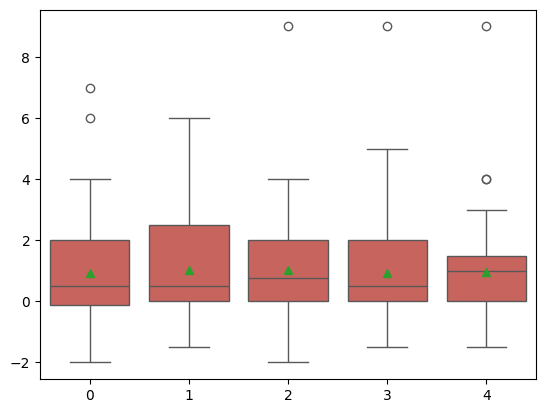

In [69]:
plot_n_boxplots([ar_results[:, 0, 1, 1].flatten(), ar_results[:, 1, 1, 1].flatten(), ar_results[:, 2, 1, 1].flatten(), ar_results[:, 3, 1, 1].flatten(), ar_results[:, 4, 1, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to not av_ref

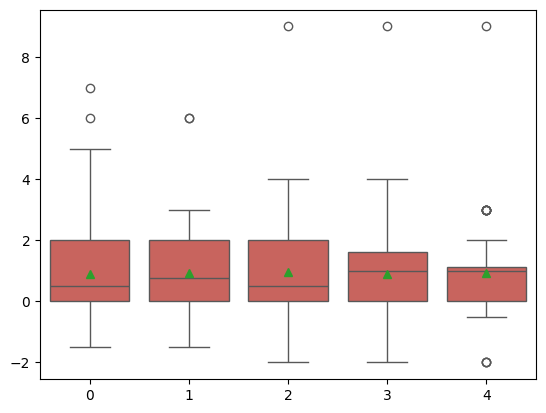

In [70]:
plot_n_boxplots([ar_results[:, 0, 0, 1].flatten(), ar_results[:, 1, 0, 1].flatten(), ar_results[:, 2, 0, 1].flatten(), ar_results[:, 3, 0, 1].flatten(), ar_results[:, 4, 0, 1].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [71]:
print(ar_results[:, 1, 1, 1].flatten())

[ 0.   0.  -0.5 -0.5  2.5  1.5  2.5  0.  -1.5  1.5  0.   1.5 -1.5 -1.
 -0.5  1.   1.   2.   3.   3.   1.   1.   2.   0.   3.  -1.   3.   0.
  0.   2.   2.   6.   0.   0.   3.   3.   0.   3.   4.   3.   0.  -1.
  0.   3.   0.   3.   3.   0.   0.   0.5  1.   0.  -0.5  0.   0.   0.
  0.   1.   2.5  0.   0.   0.5  0.5  2.5]


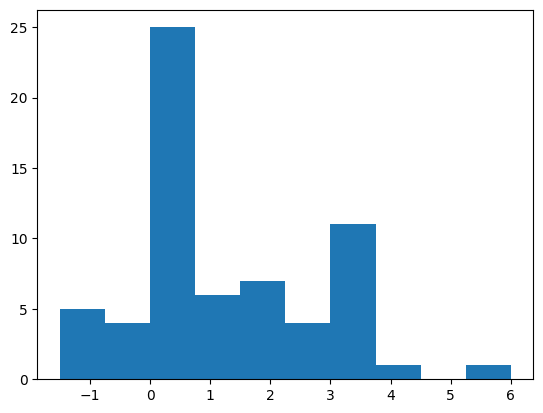

In [72]:
plt.hist(ar_results[:, 1, 1, 1])
plt.show()

In [73]:
t_statistic, p_value = stats.ttest_1samp(a=ar_results[:, 1, 1, 1], popmean=0) 
print(t_statistic , p_value)

5.30134066631361 1.569640151796438e-06


Investigating the statisitcs of itteration maximazing the average number of biological components.

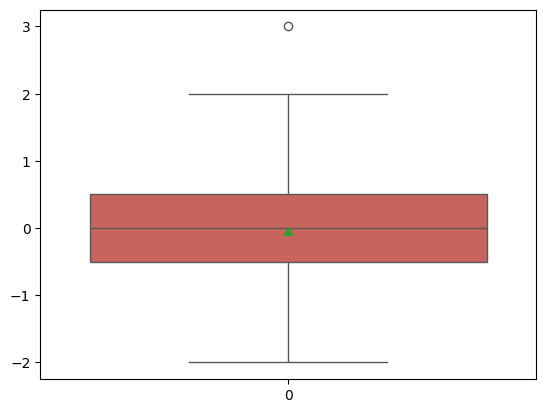

In [74]:
plot_n_boxplots([ar_results[:, 3, 0, 2].flatten()], [sns.xkcd_rgb["pale red"]])

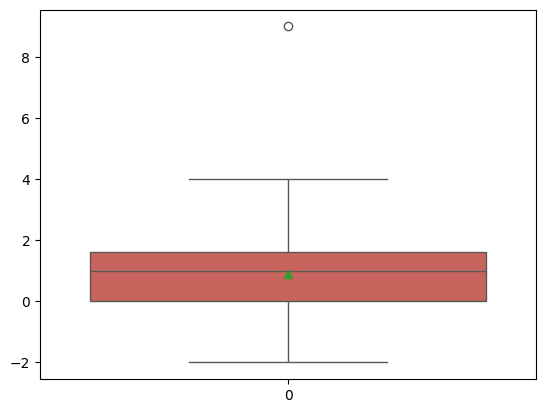

In [75]:
plot_n_boxplots([ar_results[:, 3, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

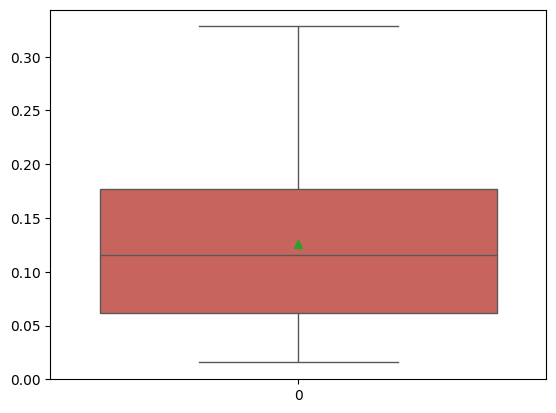

In [76]:
plot_n_boxplots([ar_results[:, 3, 0, 0].flatten()], [sns.xkcd_rgb["pale red"]])

Compared to the other thresholds

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\plotting\templates.py:111: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


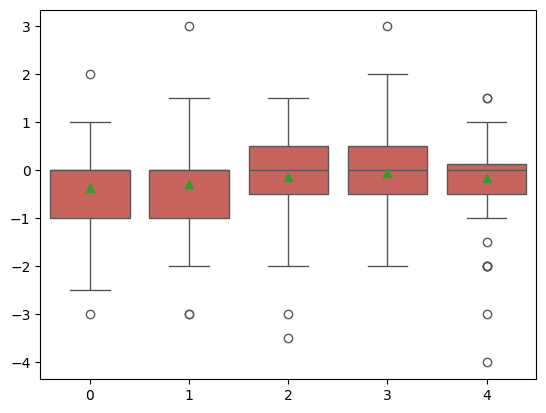

In [77]:
plot_n_boxplots([ar_results[:, 0, 0, 2].flatten(), ar_results[:, 1, 0, 2].flatten(), ar_results[:, 2, 0, 2].flatten(), ar_results[:, 3, 0, 2].flatten(), ar_results[:, 4, 0, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

Compared to av_ref

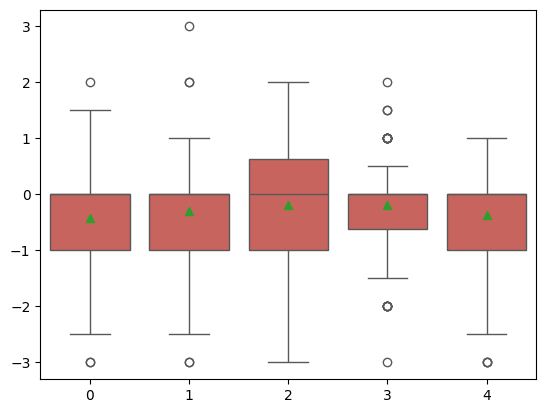

In [78]:
plot_n_boxplots([ar_results[:, 0, 1, 2].flatten(), ar_results[:, 1, 1, 2].flatten(), ar_results[:, 2, 1, 2].flatten(), ar_results[:, 3, 1, 2].flatten(), ar_results[:, 4, 1, 2].flatten()], [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["pale red"]])

More stats for the best one.

In [79]:
print(ar_results[:, 3, 0, 2].flatten())

[ 1.  -0.5  0.5  1.   1.5  0.   0.  -0.5  0.  -2.  -1.   0.5  0.   1.5
  1.5 -0.5 -2.   0.   0.   0.   0.   0.  -2.  -1.  -2.   0.   0.  -1.
 -1.   1.   1.   0.   0.   0.   0.   2.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  -2.   0.   0.   0.5  3.   0.5  1.   0.5 -2.   0.5  0.
 -1.  -1.   1.  -1.   0.5 -1.5 -1.   1. ]


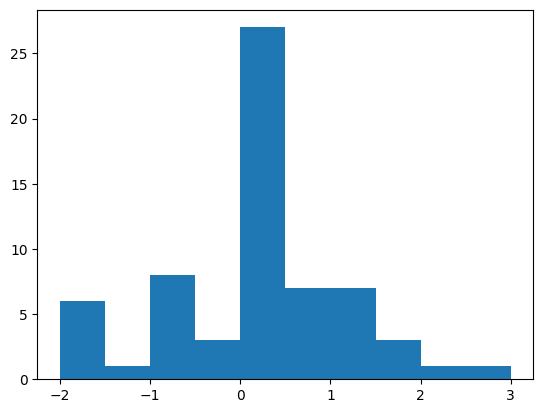

In [80]:
plt.hist(ar_results[:, 3, 0, 2])
plt.show()

In [81]:
t_statistic, p_value = stats.ttest_1samp(a=ar_results[:, 3, 0, 2], popmean=0) 
print(t_statistic , p_value)

-0.373934985810132 0.7097082269812273
